# Finding Nash Equilibriums 

I've always heard about to player games in game theory. I like the idea that the players could find nash equilibriums by taking the opponents last move into account and changing thier strategy accordingly. 
Player's strategy can be represented by a probability distribution over tensors. Every round the player can update thier strategy based on thier loss. They should make small updates so as to not overcorrect. 


In [5]:
import torch



In [6]:



import matplotlib.pyplot as plt

def solve(game, p_float=0.25, q_float=0.75, iter=100):
    q = torch.tensor(q_float, requires_grad=True)
    p = torch.tensor(p_float, requires_grad=True)
    l1_list, l2_list, p_list, q_list = [], [],[],[]

    def update(l1, l2, p, q):
        l1_list.append(l1), l2_list.append(l2), p_list.append(p), q_list.append(q)


    for i in range(iter):

        
        q_ten = q*torch.tensor([1,-1]) + torch.tensor([0,1])
        p_ten = p*torch.tensor([1,-1]) + torch.tensor([0,1])

        l1 = q_ten @ (game @ torch.tensor([1.,0])) @ p_ten
        l2 = q_ten @ (game @ torch.tensor([0,1.])) @ p_ten
        update(l1.data.numpy().copy(), l2.data.numpy().copy(), p.data.numpy().copy(), q.data.numpy().copy())


        l1.backward(retain_graph=True)
        alpha = 0.01
        with torch.no_grad():
            q.data.add_(alpha * q.grad.data)
            q.data.clamp_(0,1)
            q.grad.zero_()
            p.grad.zero_()

        l2.backward(retain_graph=True)
        alpha = 0.01
        with torch.no_grad():
            p.data.add_(alpha * p.grad.data)
            p.data.clamp_(0,1)
            p.grad.zero_()
            q.grad.zero_()  

        
    r = range(len(l1_list))
    plt.title('loss')
    plt.plot(r, l1_list, label='l1')
    plt.plot(r, l2_list, label='l2')
    plt.legend()
    plt.show()

    plt.title('strategy')
    plt.plot(r, p_list, label='p')
    plt.plot(r, q_list, label='q')
    plt.legend()
    plt.show() 



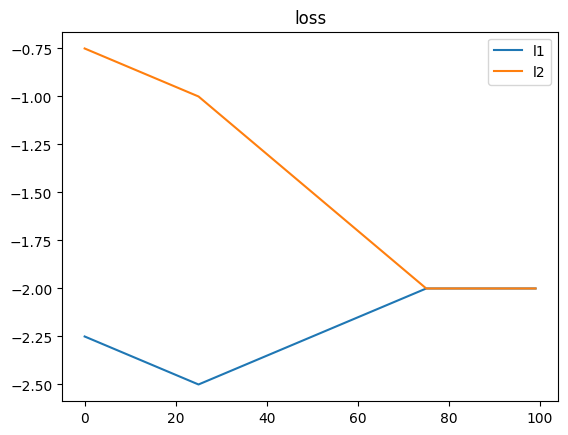

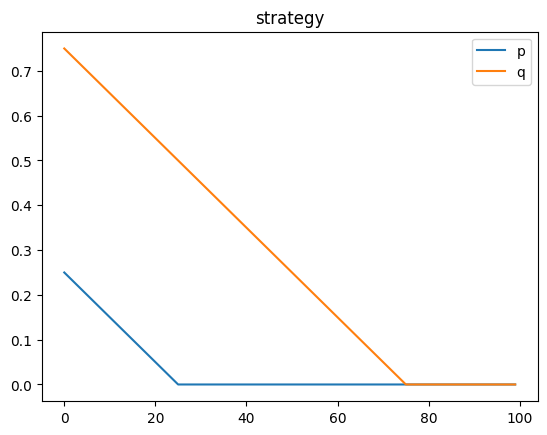

In [7]:
# Prisoners del
game = torch.tensor([
    [[-1,-1],[-3,0]]
    ,[[0, -3],[-2,-2]]
    ],dtype=torch.float)
solve(game)


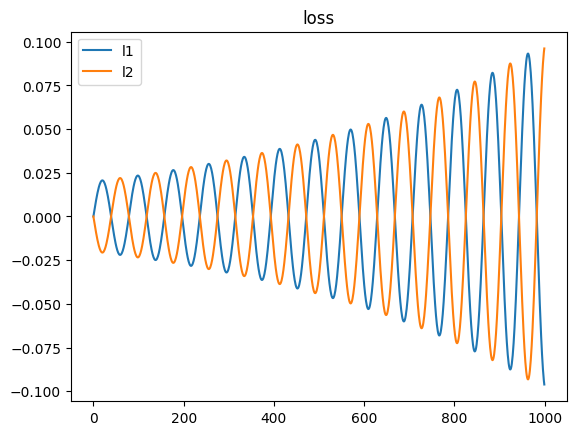

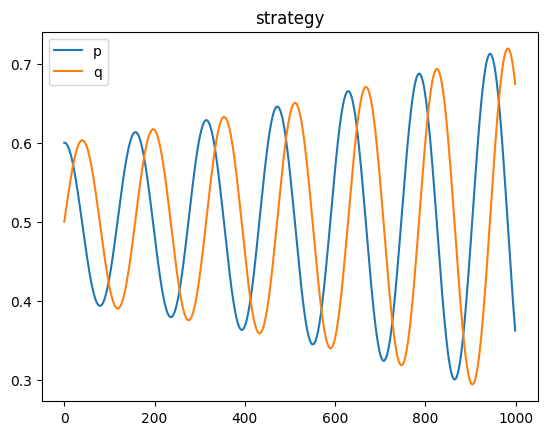

In [11]:
# Mathcing pennies

game = torch.tensor([
    [[1,-1],[-1,1]]
    ,[[-1, 1],[1,-1]]
    ],dtype=torch.float)
solve(game, p_float=.6, q_float=.5,iter=1000)
